In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
adult = fetch_ucirepo(id=2)  
X = adult.data.features 
y = adult.data.targets 

In [4]:
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Mon Aug 07 2023',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the follow

In [5]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [6]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [7]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [9]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [11]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [12]:
X['workclass'].fillna('undefined',inplace=True)
X['occupation'].fillna('undefined',inplace=True)
X['native-country'].fillna('undefined',inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\647077713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna('undefined',inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\647077713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna('undefined',inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\647077713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['

In [13]:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [14]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [15]:
y['income'] = y['income'].str.replace('.', '')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\4161210382.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y['income'] = y['income'].str.replace('.', '')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\4161210382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.replace('.', '')


In [16]:
y['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [17]:
category_counts = y['income'].value_counts()

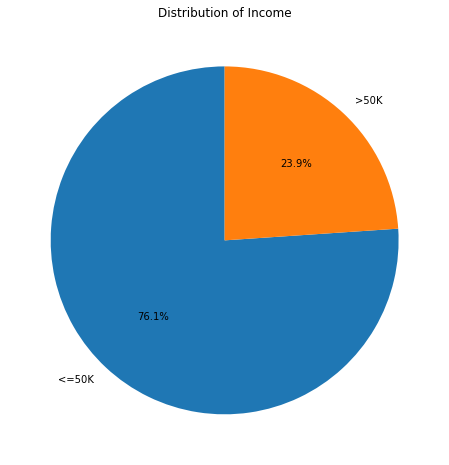

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Income')
plt.show()

In [19]:
X['row_number'] = X.index
y['row_number'] = y.index
adult_df = pd.merge(X, y, left_on='row_number', right_on='row_number')
X.drop('row_number', axis=1, inplace=True)
y.drop('row_number', axis=1, inplace=True)
adult_df.drop('row_number', axis=1, inplace=True)
adult_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\1209278657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['row_number'] = y.index
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22004\1209278657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop('row_number', axis=1, inplace=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,undefined,321403,HS-grad,9,Widowed,undefined,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


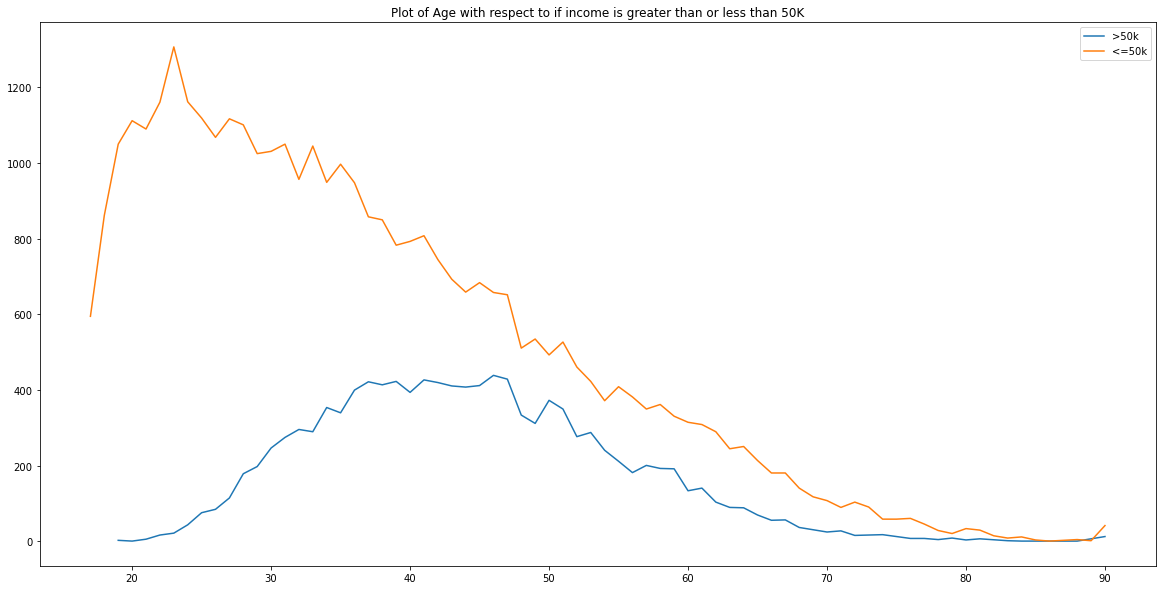

In [20]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=adult_df[adult_df['income']=='>50K']['age'].value_counts().index, y=adult_df[adult_df['income']=='>50K']['age'].value_counts().values,label='>50k')
sns.lineplot(x=adult_df[adult_df['income']=='<=50K']['age'].value_counts().index, y=adult_df[adult_df['income']=='<=50K']['age'].value_counts().values,label='<=50k')
plt.title('Plot of Age with respect to if income is greater than or less than 50K')
plt.show()

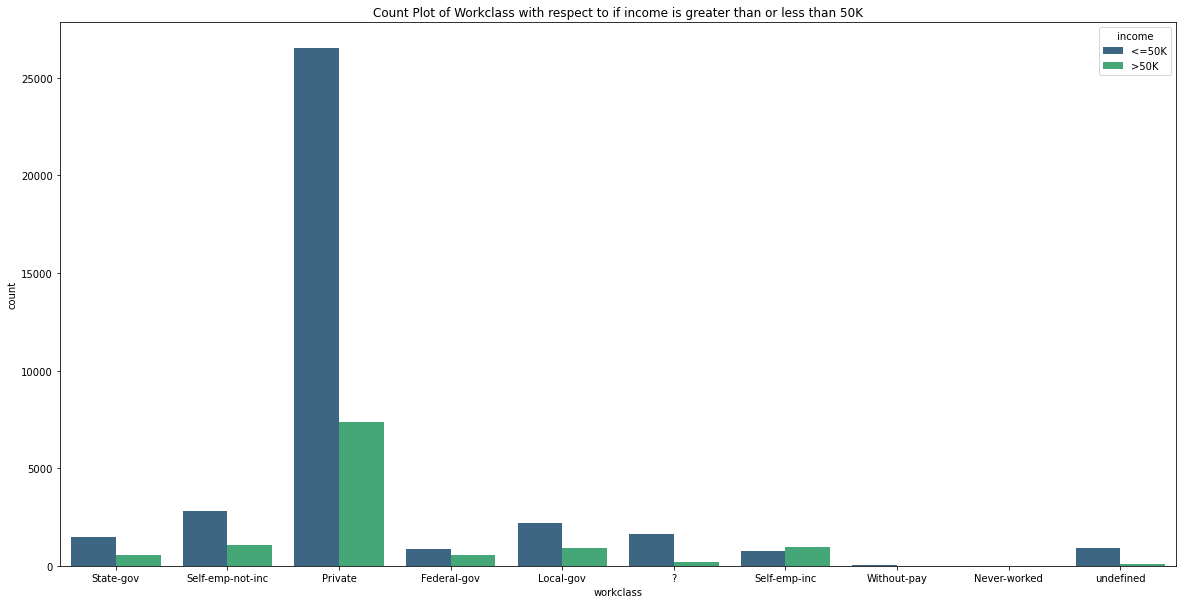

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(x='workclass',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Workclass with respect to if income is greater than or less than 50K')
plt.show()

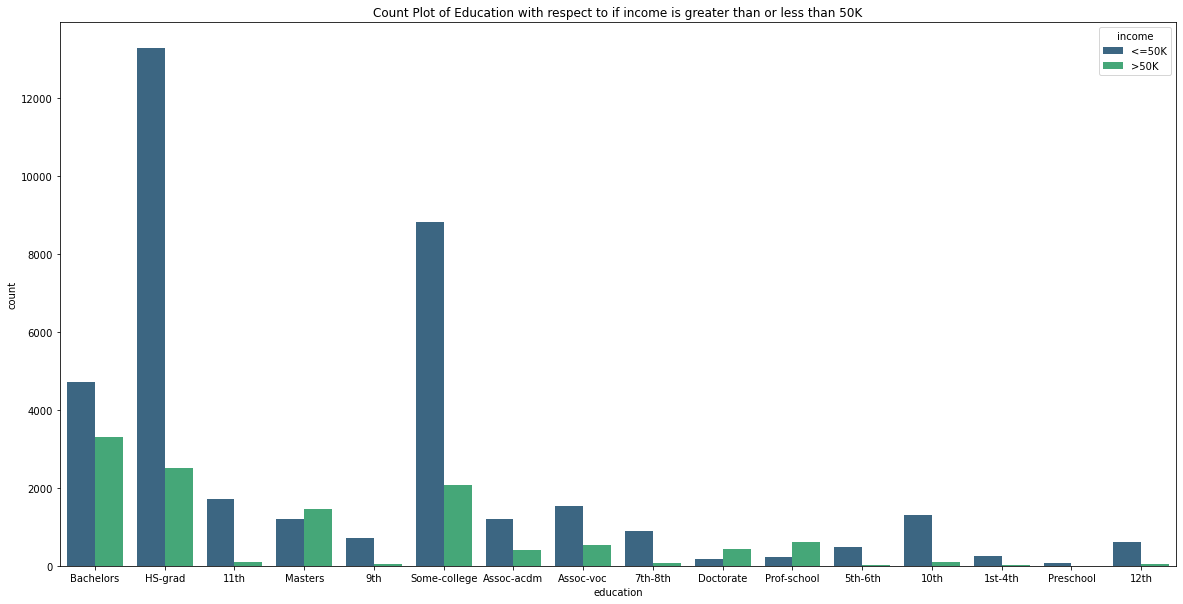

In [22]:
plt.figure(figsize=(20, 10))
sns.countplot(x='education',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Education with respect to if income is greater than or less than 50K')
plt.show()

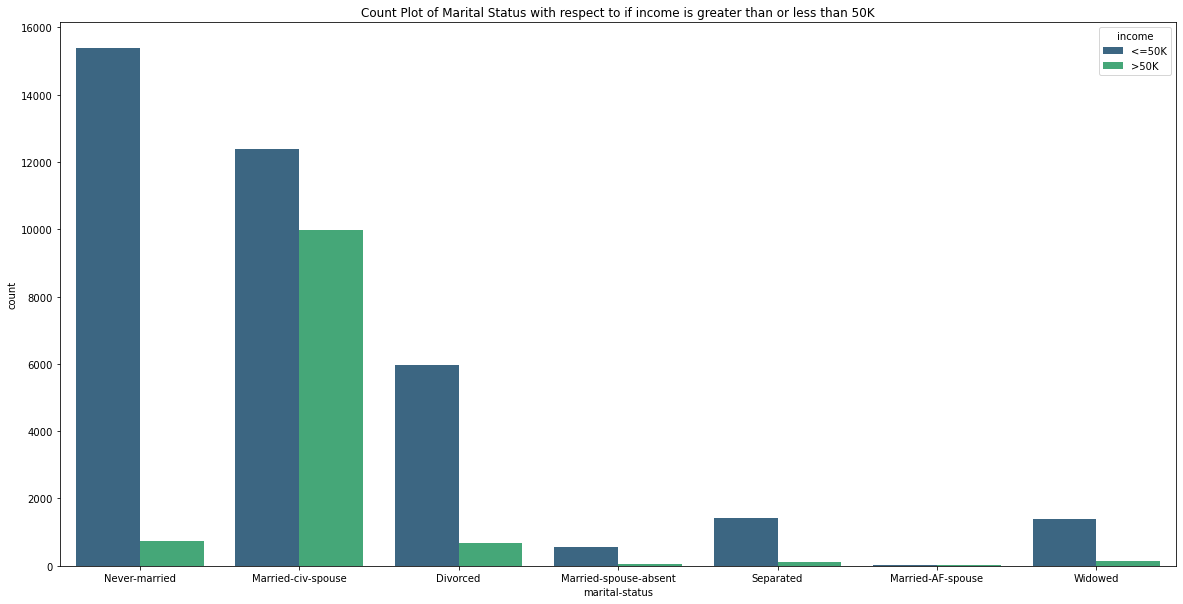

In [23]:
plt.figure(figsize=(20, 10))
sns.countplot(x='marital-status',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Marital Status with respect to if income is greater than or less than 50K')
plt.show()

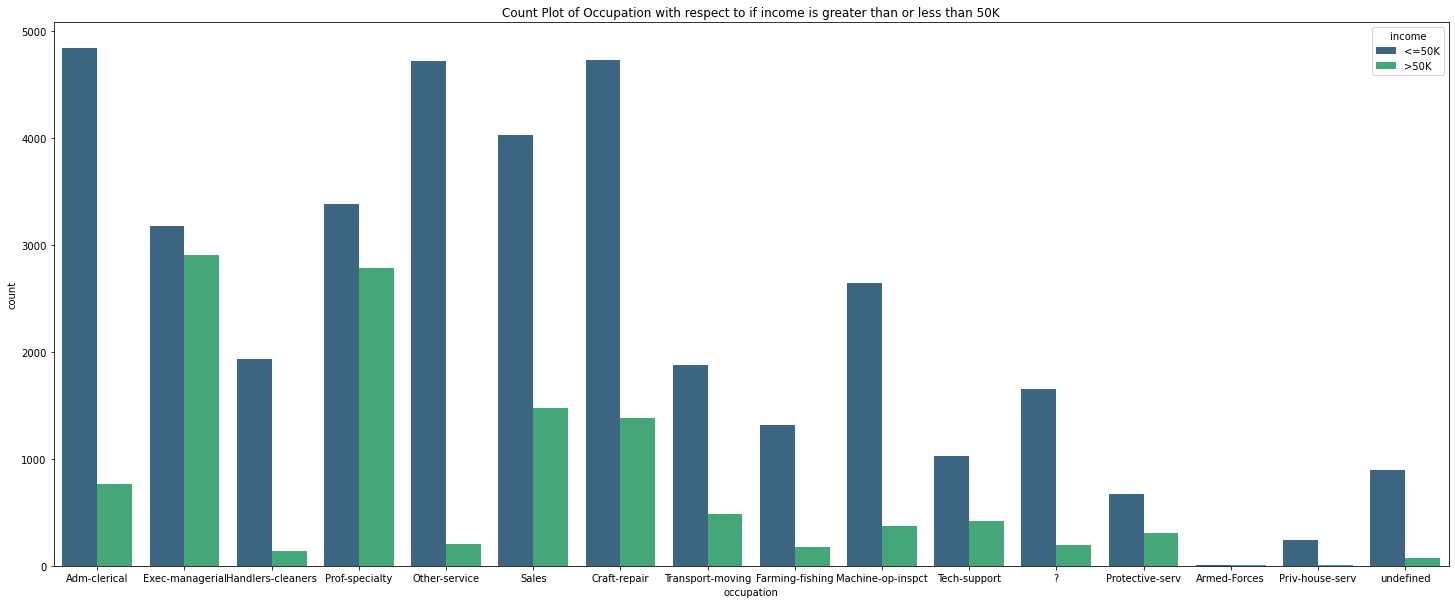

In [24]:
plt.figure(figsize=(25, 10))
sns.countplot(x='occupation',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Occupation with respect to if income is greater than or less than 50K')
plt.show()

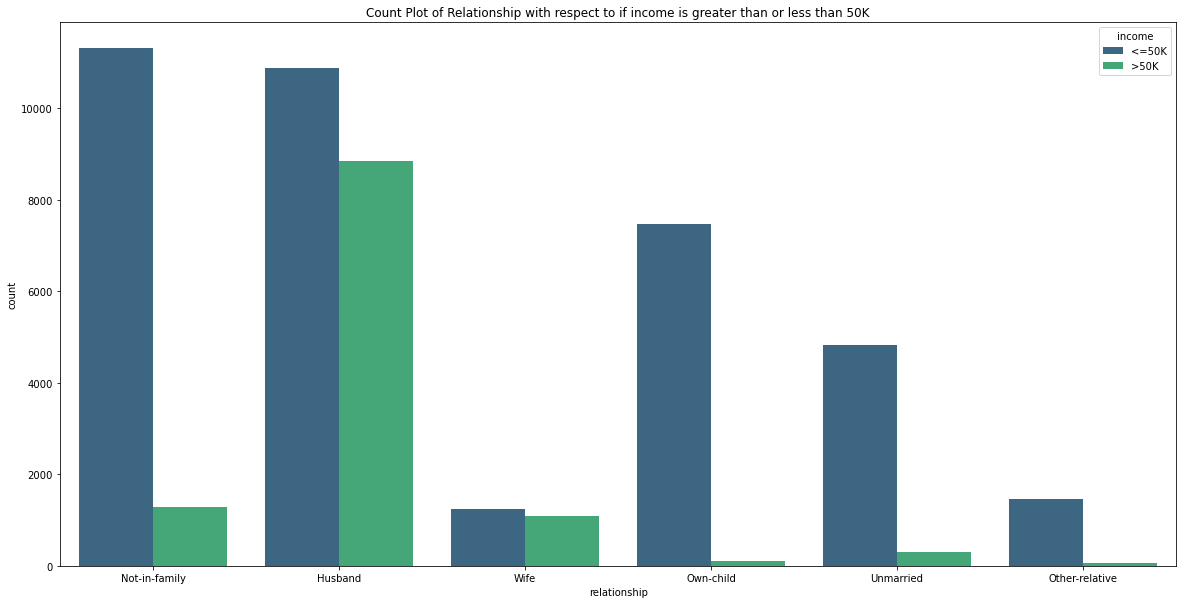

In [25]:
plt.figure(figsize=(20, 10))
sns.countplot(x='relationship',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Relationship with respect to if income is greater than or less than 50K')
plt.show()

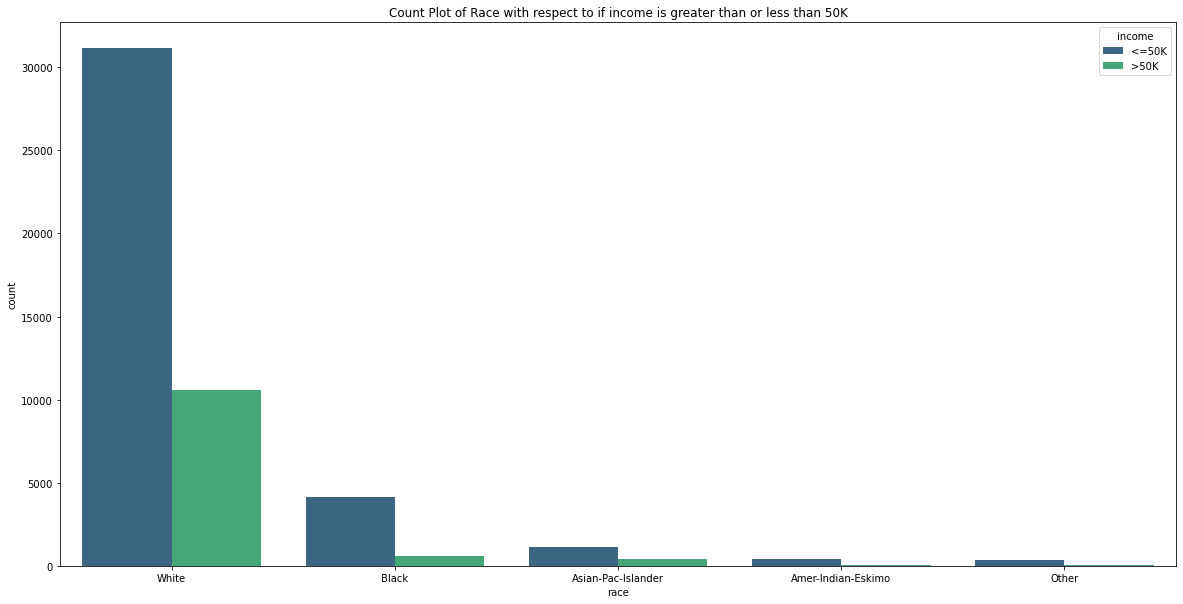

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x='race',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Race with respect to if income is greater than or less than 50K')
plt.show()

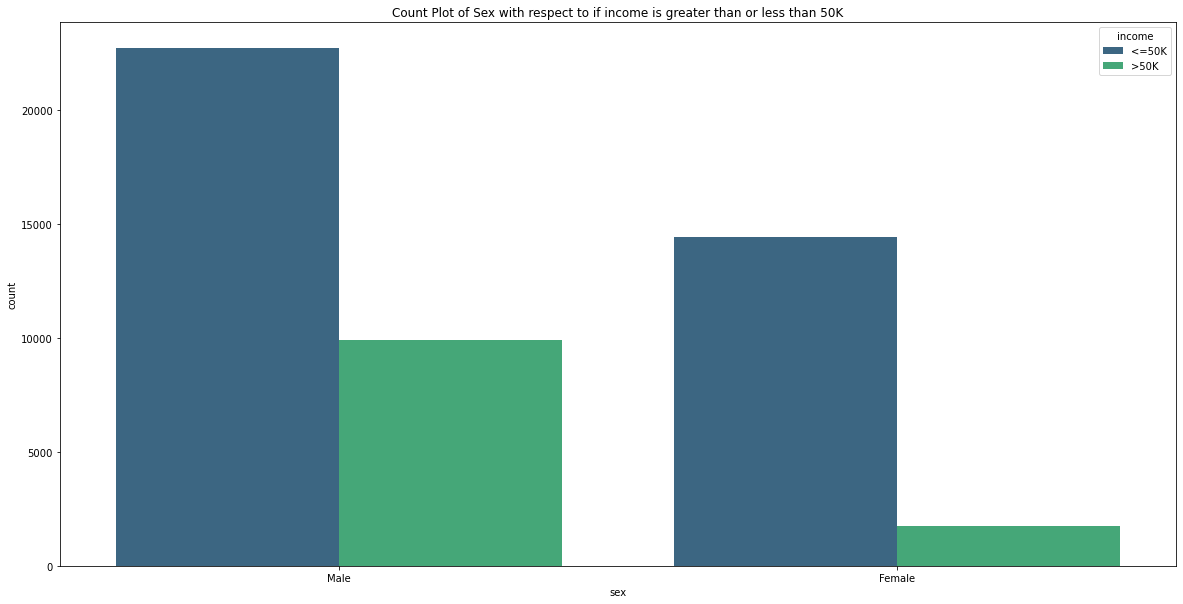

In [27]:
plt.figure(figsize=(20, 10))
sns.countplot(x='sex',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Sex with respect to if income is greater than or less than 50K')
plt.show()

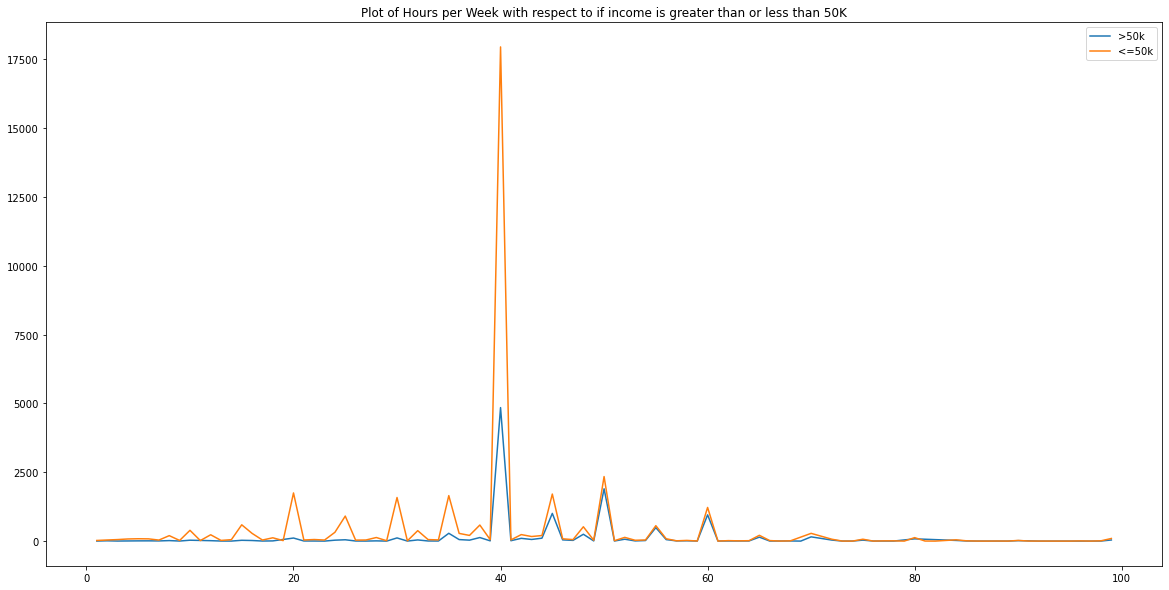

In [28]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=adult_df[adult_df['income']=='>50K']['hours-per-week'].value_counts().index, y=adult_df[adult_df['income']=='>50K']['hours-per-week'].value_counts().values,label='>50k')
sns.lineplot(x=adult_df[adult_df['income']=='<=50K']['hours-per-week'].value_counts().index, y=adult_df[adult_df['income']=='<=50K']['hours-per-week'].value_counts().values,label='<=50k')
plt.title('Plot of Hours per Week with respect to if income is greater than or less than 50K')
plt.show()

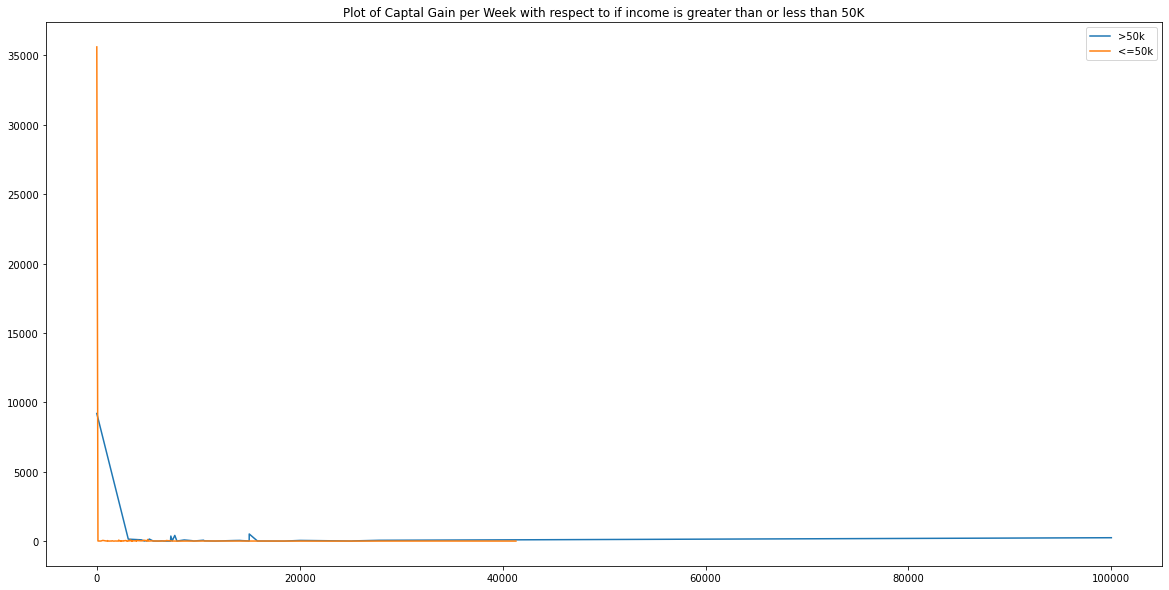

In [29]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=adult_df[adult_df['income']=='>50K']['capital-gain'].value_counts().index, y=adult_df[adult_df['income']=='>50K']['capital-gain'].value_counts().values,label='>50k')
sns.lineplot(x=adult_df[adult_df['income']=='<=50K']['capital-gain'].value_counts().index, y=adult_df[adult_df['income']=='<=50K']['capital-gain'].value_counts().values,label='<=50k')
plt.title('Plot of Captal Gain per Week with respect to if income is greater than or less than 50K')
plt.show()

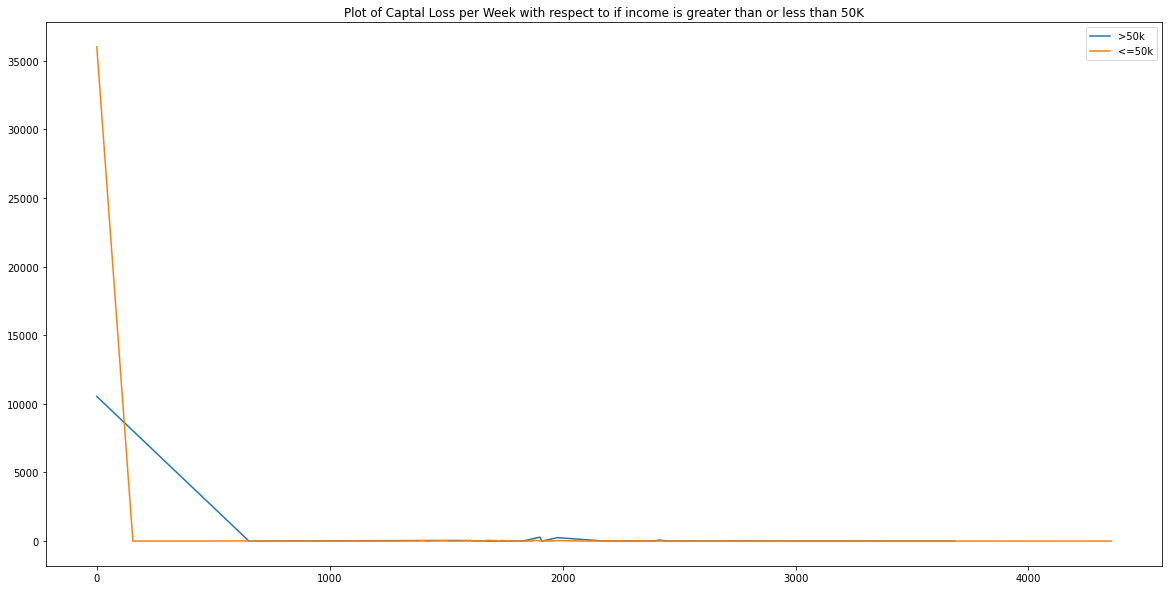

In [30]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=adult_df[adult_df['income']=='>50K']['capital-loss'].value_counts().index, y=adult_df[adult_df['income']=='>50K']['capital-loss'].value_counts().values,label='>50k')
sns.lineplot(x=adult_df[adult_df['income']=='<=50K']['capital-loss'].value_counts().index, y=adult_df[adult_df['income']=='<=50K']['capital-loss'].value_counts().values,label='<=50k')
plt.title('Plot of Captal Loss per Week with respect to if income is greater than or less than 50K')
plt.show()

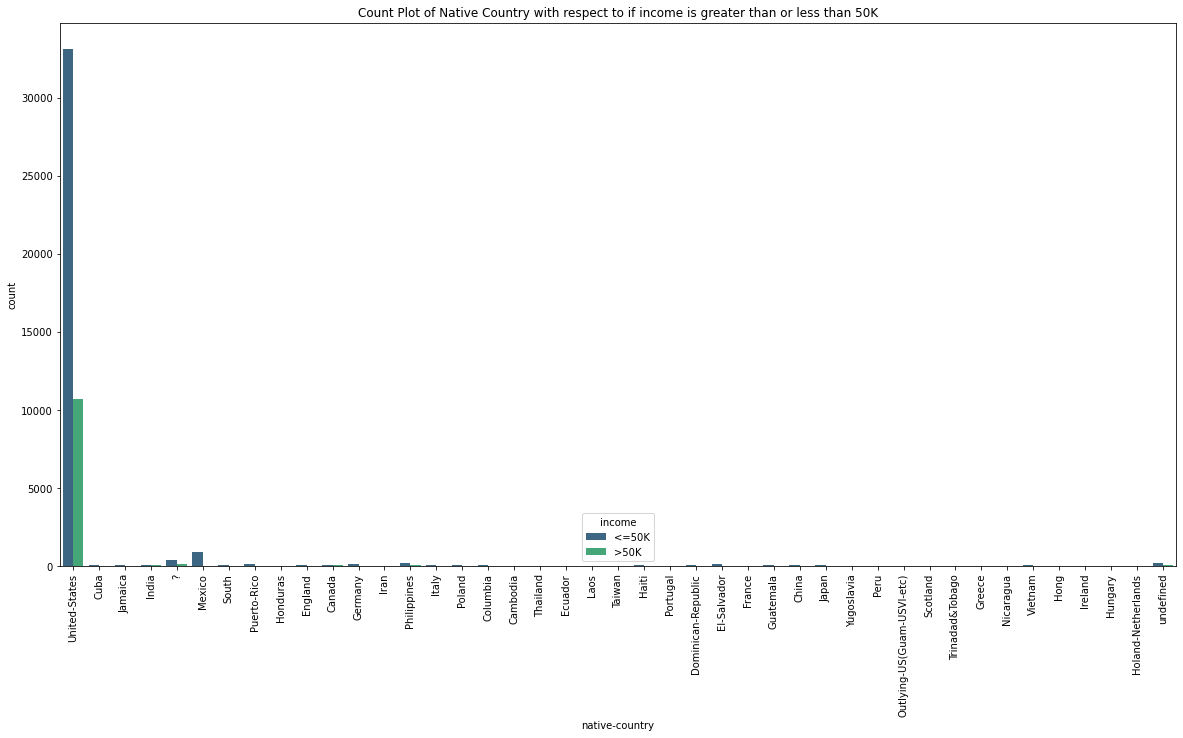

In [31]:
plt.figure(figsize=(20, 10))
sns.countplot(x='native-country',hue='income', data=adult_df, palette='viridis') 
plt.title('Count Plot of Native Country with respect to if income is greater than or less than 50K')
plt.xticks(rotation=90)
plt.show()

In [32]:
adult_df.drop('fnlwgt',axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

In [35]:
adult_df_2=pd.DataFrame()
adult_df_2['age']=adult_df['age']
adult_df_2['workclass'] = label_encoder.fit_transform(adult_df['workclass'])
adult_df_2['education-num']=adult_df['education-num']
adult_df_2['marital-status'] = label_encoder.fit_transform(adult_df['marital-status'])
adult_df_2['occupation'] = label_encoder.fit_transform(adult_df['occupation'])
adult_df_2['relationship'] = label_encoder.fit_transform(adult_df['relationship'])
adult_df_2['race'] = label_encoder.fit_transform(adult_df['race'])
adult_df_2['sex'] = label_encoder.fit_transform(adult_df['sex'])
adult_df_2['capital-gain']=adult_df['capital-gain']
adult_df_2['capital-loss']=adult_df['capital-loss']
adult_df_2['hours-per-week']=adult_df['hours-per-week']
adult_df_2['native-country'] = label_encoder.fit_transform(adult_df['native-country'])
adult_df_2['income'] = label_encoder.fit_transform(adult_df['income'])

In [36]:
adult_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   workclass       48842 non-null  int32
 2   education-num   48842 non-null  int64
 3   marital-status  48842 non-null  int32
 4   occupation      48842 non-null  int32
 5   relationship    48842 non-null  int32
 6   race            48842 non-null  int32
 7   sex             48842 non-null  int32
 8   capital-gain    48842 non-null  int64
 9   capital-loss    48842 non-null  int64
 10  hours-per-week  48842 non-null  int64
 11  native-country  48842 non-null  int32
 12  income          48842 non-null  int32
dtypes: int32(8), int64(5)
memory usage: 3.7 MB


In [37]:
adult_df_2.describe()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,4.047889,10.078089,2.618750,6.874370,1.443287,3.668052,0.668482,1079.067626,87.502314,40.422382,36.984972,0.239282
std,13.710510,1.528374,2.570973,1.507703,4.284442,1.602151,0.845986,0.470764,7452.019058,403.004552,12.391444,7.278644,0.426649
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,9.000000,16.000000,6.000000,15.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,42.000000,1.000000


In [38]:
adults_corr=adult_df_2.corr()
adults_corr

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.016248,0.030940,-0.263978,-0.014721,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002516,0.230369
workclass,0.016248,1.000000,0.015436,-0.021336,0.291224,-0.047994,0.043965,0.058775,0.022470,0.008475,0.052769,0.001600,0.006258
education-num,0.030940,0.015436,1.000000,-0.069992,0.087977,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.062457,0.332613
marital-status,-0.263978,-0.021336,-0.069992,1.000000,0.009486,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.019584,-0.199072
occupation,-0.014721,0.291224,0.087977,0.009486,1.000000,-0.051154,0.001504,0.057119,0.016656,0.015759,0.029698,-0.003213,0.049353
relationship,-0.263383,-0.047994,-0.090534,0.187800,-0.051154,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.003897,-0.253214
race,0.028421,0.043965,0.029239,-0.070104,0.001504,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.130620,0.070934
sex,0.088120,0.058775,0.009328,-0.127479,0.057119,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.008983,0.214628
capital-gain,0.077229,0.022470,0.125146,-0.043969,0.016656,-0.056510,0.011581,0.047094,1.000000,-0.031441,0.082157,0.000493,0.223013
capital-loss,0.056944,0.008475,0.080972,-0.033872,0.015759,-0.057201,0.018595,0.045480,-0.031441,1.000000,0.054467,0.000280,0.147554


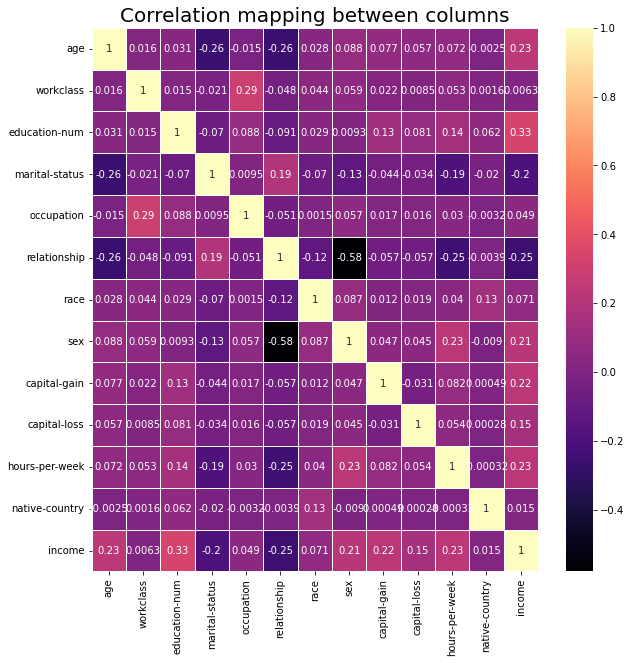

In [39]:
plt.figure(figsize=(10, 10))
sns.heatmap(adults_corr,cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.title('Correlation mapping between columns',fontsize=20)
plt.show()

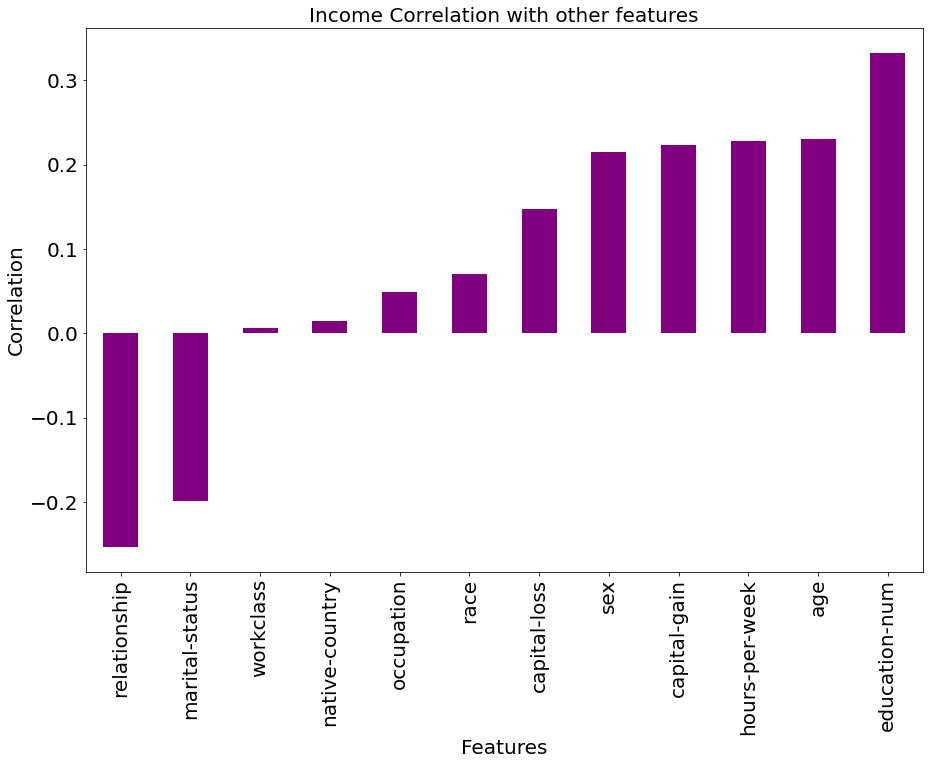

In [40]:
plt.figure(figsize=(15,10))
adults_corr['income'][:-1].sort_values().plot(kind='bar',color='purple')
plt.title('Income Correlation with other features',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Features',fontdict={'size':20})
plt.ylabel('Correlation',fontdict={'size':20})
plt.show()

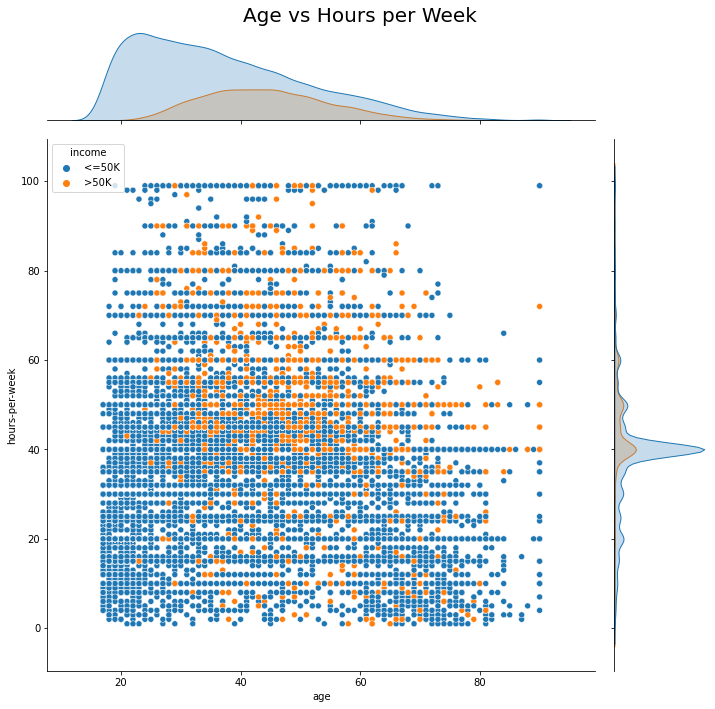

In [41]:
plot=sns.jointplot(x='age',y='hours-per-week',hue='income',data=adult_df,kind="scatter",height=10)
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('Age vs Hours per Week',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Age',fontdict={'size':20})
plt.ylabel('Hour per Week',fontdict={'size':20})
plt.show()

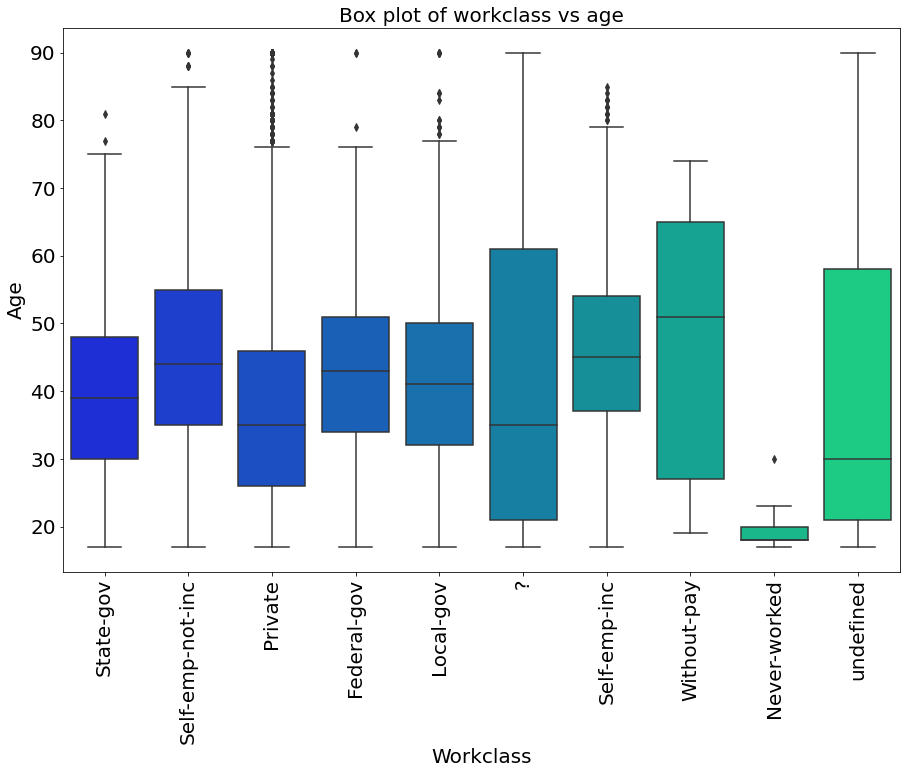

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(x='workclass',y='age',data=adult_df,palette='winter')
plt.title('Box plot of workclass vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Workclass',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

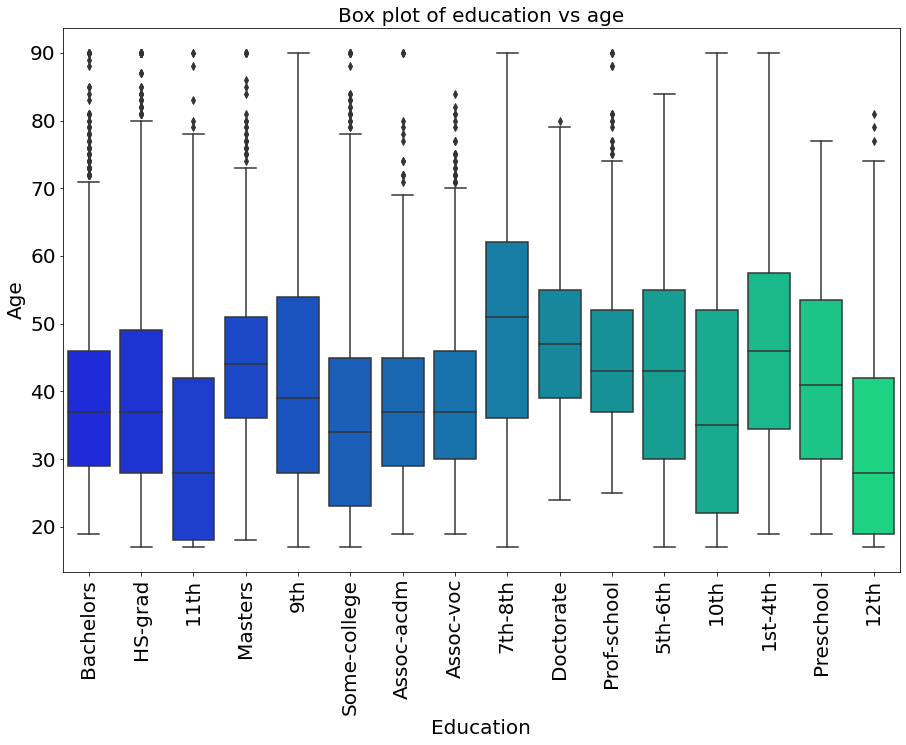

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(x='education',y='age',data=adult_df,palette='winter')
plt.title('Box plot of education vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Education',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

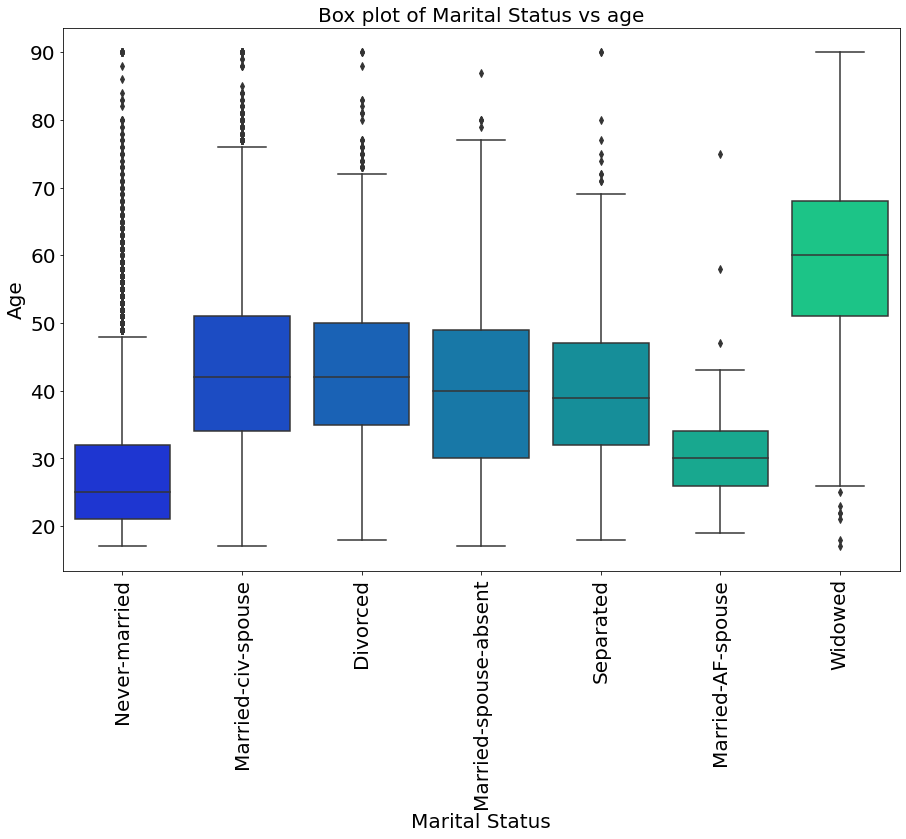

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(x='marital-status',y='age',data=adult_df,palette='winter')
plt.title('Box plot of Marital Status vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Marital Status',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

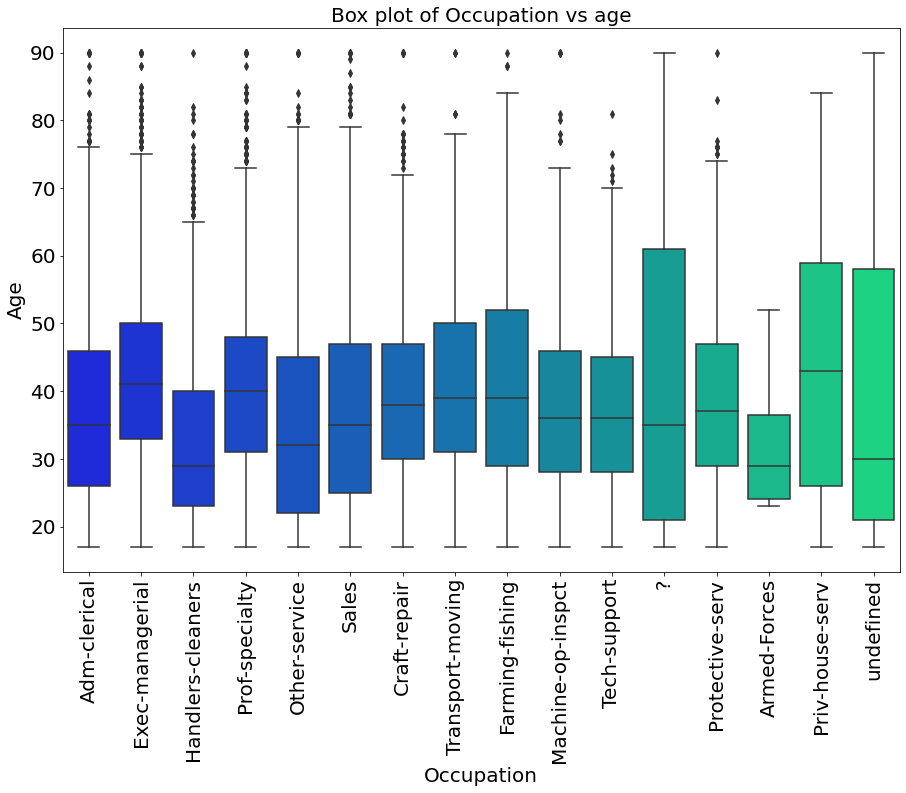

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x='occupation',y='age',data=adult_df,palette='winter')
plt.title('Box plot of Occupation vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Occupation',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

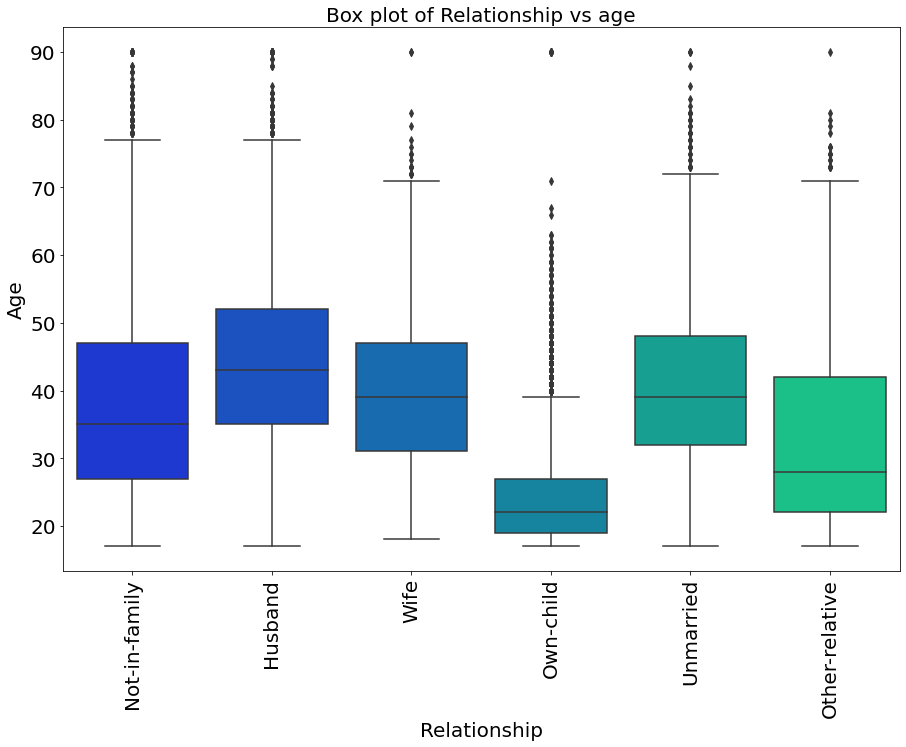

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(x='relationship',y='age',data=adult_df,palette='winter')
plt.title('Box plot of Relationship vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Relationship',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

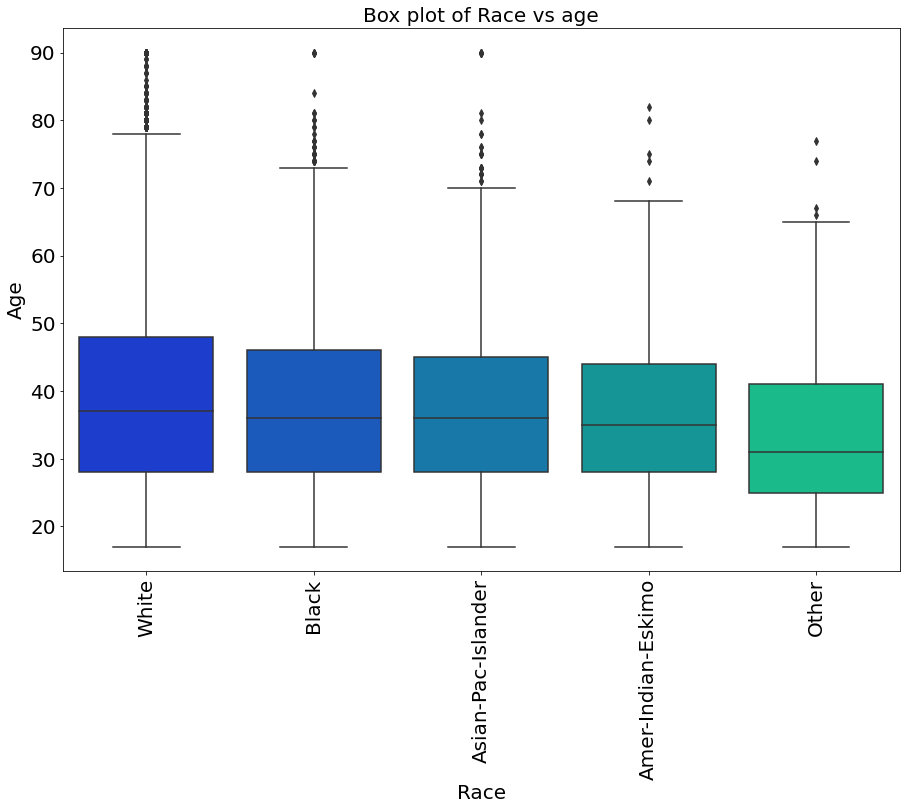

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(x='race',y='age',data=adult_df,palette='winter')
plt.title('Box plot of Race vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Race',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

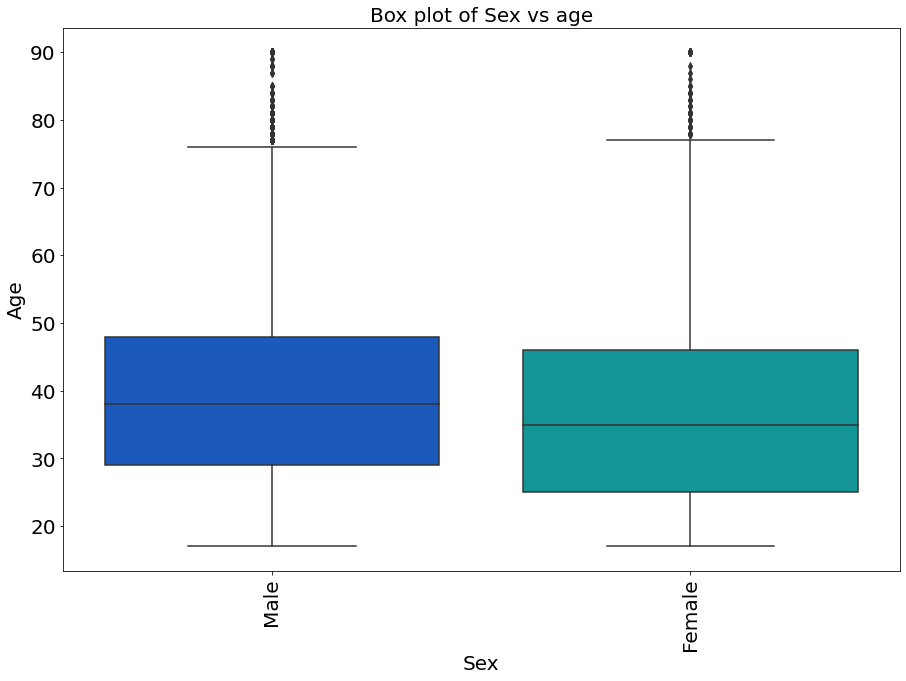

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(x='sex',y='age',data=adult_df,palette='winter')
plt.title('Box plot of Sex vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Sex',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

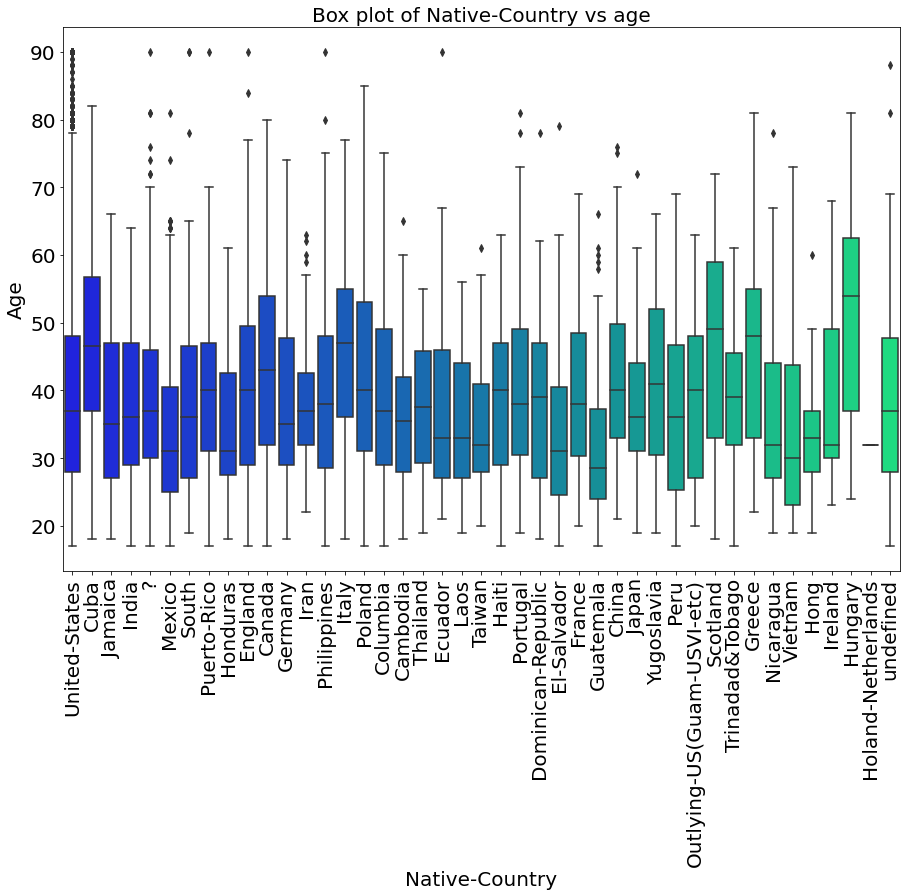

In [51]:
plt.figure(figsize=(15,10))
sns.boxplot(x='native-country',y='age',data=adult_df,palette='winter')
plt.title('Box plot of Native-Country vs age',size=20)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Native-Country',fontdict={'size':20})
plt.ylabel('Age',fontdict={'size':20})
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc=RandomForestClassifier(n_estimators=1000)

In [54]:
ml_X=adult_df_2.drop('income',axis=1)
ml_Y=adult_df_2['income']

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(ml_X,ml_Y,test_size=0.2)

In [62]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
rfc_pred=rfc.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(Y_test,rfc_pred))

[[6886  513]
 [ 925 1445]]


In [66]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7399
           1       0.74      0.61      0.67      2370

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

